
2nd advection
3rd dispersion transport

boundary condition right side-von Neumanncondition
water inflowing = water outflowing

c0 = m/v = m / (w * d* dx)

first boundary condition C on the borders is alway 0

mass conservation law(if the total mass of the tracer present in the river is constant in time)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# set size for plots
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [2]:
#Parameters of the physical object:
l = 100
w = 5 
d = 1 #depth

mean_flow_velocity = 0.1
dispersion_coefficient = 0.01
injection_point = 10 #location of the injection point
measurement_point = 90 #location of the measurement point
amount_of_injected_tracer = 1 #amount of injected tracer

#input
dx = 1e-1
dt = 1e-1
t_sim = 1000
nx = int(l/dx)
nt = int(t_sim/dt)

f'nx = {nx}, nt = {nt}'


'nx = 1000, nt = 10000'

In [3]:
ca = mean_flow_velocity * dt / dx
cd = dispersion_coefficient * dt / np.square(dx)
f'ca = {ca}, cd = {cd}'

'ca = 0.10000000000000002, cd = 0.09999999999999998'

In [4]:
def quickest(c, c_r, c_l, c_ll):
    a0 = (cd * (1 - ca) - (ca / 6) * (np.square(ca) - 3 * ca + 2))
    a1 = (cd * (2 - 3 * ca) - (ca / 2) * (np.square(ca) - 2 * ca - 1))
    a2 = (cd * (1 - 3 * ca) - (ca / 2) * (np.square(ca) - ca - 2))
    a3 = (cd * ca + (ca / 6) * (np.square(ca) - 1))
    c_next = c + a0 * c_r - a1 * c + a2 * c_l + a3 * c_ll 
    return c_next

In [5]:
#initial condition
#m- initial concentration in the injection point
c = np.zeros(nx)
injection_point = int(injection_point / dx)
c0 = amount_of_injected_tracer / (w * d* dx)
c[injection_point] = c0
f'shape c = {c.shape}, c0 = {c0}, injection_point = {injection_point}'

'shape c = (1000,), c0 = 2.0, injection_point = 100'

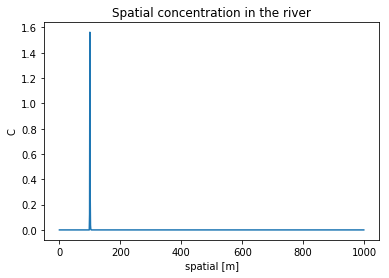

'total mass of the tracer  = 2.0, measurement_point = 900'

In [6]:
xm = int(measurement_point / dx)
flow_sum = 0
x = np.arange(0, nx)
t = np.arange(1, nt)
sum_c = []
measure_c = []

for j in range(2, nx - 2):
    c[j] = quickest(c[j], c[j+1], c[j-1], c[j-2])
    
c[nx - 1] = c[nx - 2] #right side-von Neumanncondition
sns.lineplot(x, c)
plt.xlabel('spatial [m]')
plt.ylabel('C')
plt.title('Spatial concentration in the river')
plt.show()
f'total mass of the tracer  = {sum(c)}, measurement_point = {xm}'

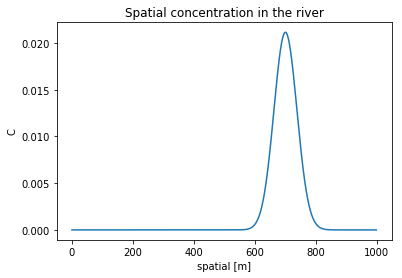

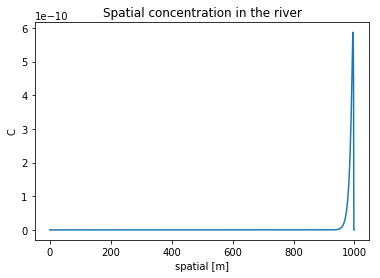

In [7]:
for i in t:
    for j in range(2, nx - 2):
        c[j] = quickest(c[j], c[j+1], c[j-1], c[j-2])
    c[nx - 1] = c[nx - 2] #right side-von Neumanncondition
    measure_c.append(c[xm])
    sum_c.append(sum(c))
    if i == nt - 1 or i == int(nt / 2):
        sns.lineplot(x, c)
        plt.xlabel('spatial [m]')
        plt.ylabel('C')
        plt.title('Spatial concentration in the river')
        plt.show()

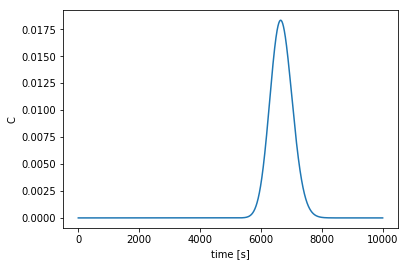

In [8]:
sns.lineplot(t, measure_c)
plt.xlabel('time [s]')
plt.ylabel('C')
plt.show()

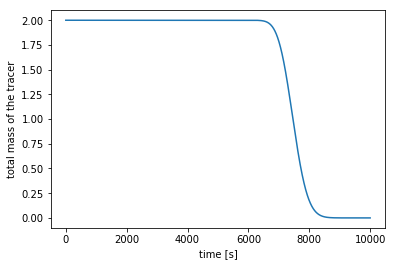

In [9]:
sns.lineplot(t, sum_c)
plt.xlabel('time [s]')
plt.ylabel('total mass of the tracer')
plt.show()

In [10]:
data.iloc([100])

NameError: name 'data' is not defined

In [ ]:
import pandas as pd